In [1]:
#读数据集
import pandas as pd 
import numpy as np
data = pd.read_csv("F:/video_cut/Bear_size.csv") 
#print(data)
data = data[["first_frame","TI","SI",'keypoint',
       'brightness','contrast','edgeLength','Hue1', 'Hue2',
       'Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation',
       'Value','video4','video6','video8']]
data

,first_frame,TI,SI,keypoint,brightness,contrast,edgeLength,Hue1,Hue2,Hue3,Hue4,Hue5,Hue6,Hue7,Saturation,Value,video4,video6,video8
0,15563.023440,19.995989,99.299255,96335.700000,131.093257,50.075259,1.639670e+06,48.885553,38.815013,26.810291,60.863760,43.180126,46.297540,146.223288,106.916600,142.922966,514.630859,219.875000,117.837891
1,16130.993160,19.377771,98.798615,92503.700000,133.617967,50.388930,1.613227e+06,49.089428,38.933680,26.928219,60.957078,43.079494,46.735909,145.862168,105.498921,145.540919,490.655273,217.898438,117.535156
2,16350.106450,18.683294,100.835434,93543.133330,134.556517,50.716521,1.642275e+06,49.262484,39.039213,26.972903,61.036619,42.962030,46.577120,145.752035,105.739884,146.580133,496.205078,214.589844,119.447266
3,16235.444340,17.698383,99.843338,93216.166670,134.781613,50.695966,1.640041e+06,48.996321,38.919626,26.879124,60.873019,43.184083,47.113937,145.922089,105.424799,146.794137,478.143555,207.558594,112.416992
4,16325.968750,16.584223,101.031555,93978.700000,134.750404,50.730587,1.645418e+06,49.144942,39.006811,26.959807,60.987993,43.106776,47.020205,145.813482,105.484641,146.764501,496.059570,214.871094,118.107422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,8096.879883,5.340825,12.266477,1497.200000,149.970529,58.319979,3.536846e+03,49.121758,83.634994,74.440953,45.339770,126.207614,119.436579,91.507964,57.965439,168.945742,155.458984,89.447266,60.113281
321,7892.939453,5.826466,12.201683,1499.233333,144.369581,58.301420,1.453691e+03,59.429101,91.880945,79.875389,50.228180,128.664562,112.233985,83.960095,59.494577,164.329315,168.297852,97.144531,65.839844
322,8608.088867,5.509458,12.686021,1447.033333,144.804492,57.764878,1.485674e+03,60.006962,92.120943,80.231870,50.551533,128.065475,111.920640,83.528597,59.350706,164.900697,151.416016,88.652344,60.095703
323,7857.112305,4.280614,10.780957,1291.200000,154.923462,57.141601,1.068472e+03,50.197428,85.221489,75.486053,45.846897,128.626873,118.785155,90.293822,53.928743,173.768869,147.665039,85.440430,57.964844


In [2]:
#vs = framesize + a * framesize * TI * n
from sklearn.model_selection import train_test_split
#数据拆分
train = data
test = data
#train,test = train_test_split(data, train_size=0.8)

#归一化
max_min_scaler = lambda x:  (x-x.mean())/ x.std()#(x - np.min(x)) / (np.max(x) - np.min(x))

# 读取数据集的0~439行、16列的数据，训练集:440*16
#n = train[['n']].values.astype(np.float32).ravel()

train_fs = np.array(train[['first_frame']].apply(max_min_scaler).values.astype(np.float32)).ravel()#.apply(max_min_scaler)
test_fs = np.array(test[['first_frame']].apply(max_min_scaler).values.astype(np.float32)).ravel()

#train_TI = np.array(train[['frame_TI']].apply(max_min_scaler).values.astype(np.float32)).ravel()
#test_TI = np.array(test[['frame_TI']].apply(max_min_scaler).values.astype(np.float32)).ravel()

train_x = train[['first_frame']]*np.array(train[['TI']])* 30
train_x = np.array(train_x.values.astype(np.float32)).ravel()#train_fs*train_TI*n
test_x = test[['first_frame']]*np.array(test[['TI']])* 30#test_fs*test_TI*n
test_x = np.array(test_x.values.astype(np.float32)).ravel()#train_fs*train_TI*n

train_y4 = np.array(train.video4.values.reshape(-1, 1).astype(np.float32)).ravel()
test_y4 = np.array(test.video4.values.reshape(-1, 1).astype(np.float32)).ravel()
train_y6 = np.array(train.video6.values.reshape(-1, 1).astype(np.float32)).ravel()
test_y6 = np.array(test.video6.values.reshape(-1, 1).astype(np.float32)).ravel()
train_y8 = np.array(train.video8.values.reshape(-1, 1).astype(np.float32)).ravel()
test_y8 = np.array(test.video8.values.reshape(-1, 1).astype(np.float32)).ravel()


def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

#df_mean_norm = mean_norm(data)
print(train_x,test_x)


[9335941.    9377481.    9164215.    8620233.    8122605.    9421068.
 8925290.    9834931.    2930352.2   3010856.8   2922989.5   3045820.8
 2904855.2   3326840.5   3121942.5   2411348.    2406362.    2138169.5
 2740974.8   2946303.2   2026401.8   1162577.9    801905.25   906744.1
  715134.8   1043538.5   1220584.6   1496356.8    728679.56   863785.
 1803624.1   2007486.9   1064160.    1533059.2   1049379.6   1193198.
  472805.25   865206.75  1020521.6   2032240.5   5624481.    5891227.5
 5729039.5   5056335.    4571635.    3832187.8   3327794.8   2780558.2
 3019581.8   4628785.5   5961446.5   7864073.    7472520.5   7191437.5
 7223426.5   7941360.    8493136.    7294112.    5556531.5   1364080.5
 1763869.9   1636578.5   1697095.9   1715684.    1795045.1   1443989.4
 1006675.1    946006.3    836763.44   822410.3   1101017.9   1071407.6
  950207.4    843219.25   761540.25   862004.5    798965.3   1583022.6
 1626729.2   1001876.2    972613.4   1872387.5   1778442.9   1773924.5
 1512030.

In [93]:
#vs = framesize + a * framesize * TI * n
import numpy as np
from scipy.optimize import leastsq

def accury(pred,y):
    return 100-(abs(pred - y)/y*100)

def func(a,x):
    return a * x + train_fs

def residuals(a,x,y):
    return y-func(a,x)

a=1
#print(residuals(a,train_y4, train_fs,train_TI,n))
#print(func( train_fs,train_TI,n,a ))
#print(train_y4)

p = leastsq(residuals, a, args=(train_x,train_y6))
print("拟合参数:",p[0])





拟合参数: [2.93307871e-05]


In [94]:
test_pre=func(p[0],test_x)
#print(test_pre,test_y6)
acc=accury(test_pre,test_y6)
print(sum(acc)/len(acc))

df = pd.read_excel('E:/研学/实验数据/Bee.xlsx')
x = df[['first_frame']]*np.array(df[['TI']])* 30
x = np.array(x.values.astype(np.float32)).ravel()#train_fs*train_TI*n
pre=func(p[0],x,)

40.004753194326334


ValueError: operands could not be broadcast together with shapes (90,) (325,) 

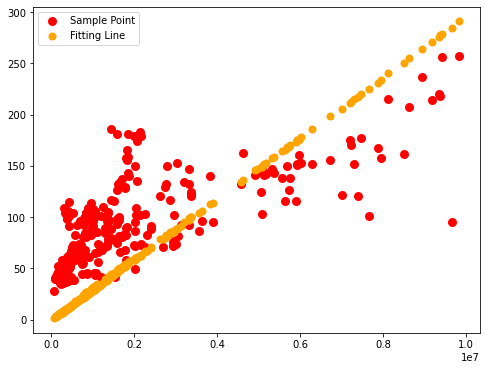

In [88]:
#-lavfi psnr=stats_file=%name%_00%%i_psnr.txt -f null -
###绘图，看拟合效果###
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(test_x,test_y6,color="red",label="Sample Point",linewidth=3) #画样本点
plt.scatter(test_x,test_pre,color="orange",label="Fitting Line",linewidth=2) #画拟合直线
plt.legend()
plt.show()

In [116]:
#vs = 
import math
import numpy as np
from scipy.optimize import leastsq


def func(p,x):
    a,b = p
    return a * x**2 + b* x +  train_fs

def residuals(p,x,y):
    return y-func(p,x)

p=[1,1]
#print(residuals(a,train_y4, train_fs,train_TI,n))
#print(func( train_fs,train_TI,n,a ))
#print(train_y4)

p = leastsq(residuals, p, args=(train_x,train_y4))
print("拟合参数:\n",p[0])


拟合参数:
 [-8.25528808e-13  6.52754640e-05]


In [117]:
test_pre=func(p[0],test_x)
print(test_pre,test_y4)#x3
acc=accury(test_pre,test_y6)
print(sum(acc)/len(acc))

[539.18445  541.3773   530.7682   503.2212   477.636    543.562
 518.6406   563.9568   184.16486  188.92506  183.55896  190.95137
 182.3021   207.66551  195.40138  152.1473   151.71837  135.07173
 172.15837  184.51443  128.06703   73.827835  50.672565  57.4724
  45.12512   66.17692   77.476135  94.90474   46.886562  55.601826
 114.80425  127.498405  68.331276  97.97615   67.4042    76.48743
  30.491405  55.693615  65.536446] [514.63086  490.65527  496.20508  478.14355  496.05957  608.38574
 550.4971   602.876    126.60156  134.26758  132.12402  143.43945
 147.02148  156.28418  156.60156  154.95996  150.49121  173.45898
 222.4209   186.20996  171.7959   132.41211  113.06152  120.45215
 110.62207  120.674805 118.243164 133.19531   87.02246   92.64844
 121.0293    97.18164   90.18652   86.856445  88.87891   81.84766
  78.30957   93.70117   92.86426 ]
80.33572223247626


In [118]:
#vs = 
import math
import numpy as np
from scipy.optimize import leastsq


def func(p,x):
    a,b,c = p
    return a * x**3 + b* x**2 + c * x +  train_fs

def residuals(p,x,y):
    return y-func(p,x)

p=[1,1,1]
#print(residuals(a,train_y4, train_fs,train_TI,n))
#print(func( train_fs,train_TI,n,a ))
#print(train_y4)

p = leastsq(residuals, p, args=(train_x,train_y4))
print("拟合参数:\n",p[0])


拟合参数:
 [ 1.27771183e-18 -1.58988757e-11  9.57468183e-05]


In [120]:
test_pre=func(p[0],test_x)
print(test_pre,test_y4)
acc=accury(test_pre,test_y6)
print(sum(acc)/len(acc))

[549.5714   555.253    527.4859   464.26056  415.3823   561.1756
 498.2991   621.1354   176.17325  178.9003   175.75085  180.02908
 174.94418  189.25572  182.49678  155.8937   155.56404  143.80272
 168.74606  176.1238   138.55037   90.88792   66.07363   73.661606
  59.674774  83.012474  94.5358   111.03122   61.581226  71.499405
 128.22536  138.26054   85.22784  113.867836  84.25798   93.5561
  41.6639    71.60155   82.29277 ] [514.63086  490.65527  496.20508  478.14355  496.05957  608.38574
 550.4971   602.876    126.60156  134.26758  132.12402  143.43945
 147.02148  156.28418  156.60156  154.95996  150.49121  173.45898
 222.4209   186.20996  171.7959   132.41211  113.06152  120.45215
 110.62207  120.674805 118.243164 133.19531   87.02246   92.64844
 121.0293    97.18164   90.18652   86.856445  88.87891   81.84766
  78.30957   93.70117   92.86426 ]
88.00300453259395


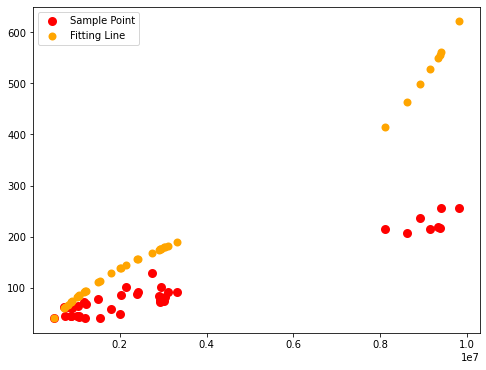

In [107]:
#-lavfi psnr=stats_file=%name%_00%%i_psnr.txt -f null -
###绘图，看拟合效果###
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(test_x,test_y6,color="red",label="Sample Point",linewidth=3) #画样本点
plt.scatter(test_x,test_pre,color="orange",label="Fitting Line",linewidth=2) #画拟合直线
plt.legend()
plt.show()

In [5]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from scipy import stats


In [19]:
#读数据集
data = pd.read_csv("F:/video_cut/Bear_size.csv") 
#print(data)
#scale放里面误差极大，需对3个x训练不同的模型################
#X = data[["first_frame", "frame_TI","frame_SI",'keypoint','brightness','contrast','edgeLength','Hue1', 'Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation','Value']].values
N4 = ["4","TI", 'Hue2','Hue4','Hue5', 'contrast',	'Saturation']
'''["4","first_frame", "TI","SI",'keypoint','brightness','edgeLength',
      'Hue1', 'Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation','Value']'''
#["4","first_frame","TI","SI",'keypoint','brightness','contrast','edgeLength','Hue1', 'Hue2', 'Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation','Value']


N6 = ["6","first_frame", "TI",'keypoint','brightness','edgeLength',
      'Hue1', 'Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	 'Saturation','Value']
#["6","first_frame","TI","SI",'keypoint', 'brightness','contrast','edgeLength','Hue1', 'Hue2', 'Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation','Value']
N8 = ["8","first_frame", "TI","SI",'keypoint','brightness', 'edgeLength',
      'Hue1', 'Hue2','Hue3','Hue4', 'Hue5',	'Hue6',	'Hue7',	 'Saturation']
#["8","first_frame","TI","SI",'keypoint', 'brightness','contrast','edgeLength','Hue1', 'Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7','Saturation','Value']

X = data[N4].values##########
#现在加入了value
Y = data.video4.values.reshape(-1, 1)############

train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.999,random_state=1)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行
train_x2,test_x,train_y2,test_y=train_test_split(X,Y,train_size=0.8,random_state=1)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行

print(type(train_x))

#将数据转换成Tensor LongTensor等价于int64
train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
test_x = torch.from_numpy(test_x).type(torch.FloatTensor)
test_y = torch.from_numpy(test_y).type(torch.FloatTensor)
print(test_x.shape,train_x.shape,X.shape)
points = int(test_x.shape[1])

#数据只有3805行故batchsize设置8较优

batch = 8#32 
no_of_batches = len(data)//batch
epochs = 3000#3000

#TensorDataset()可以对tensor进行打包即合并
train_ds = TensorDataset(train_x,train_y)
#希望模型不关注训练集数据顺序故用乱序
train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True)
test_ds = TensorDataset(test_x,test_y)
#对测试集不需要用乱序避免工作量增加
test_dl = DataLoader(test_ds,batch_size=batch)
#print(test_x,test_y)

<class 'numpy.ndarray'>
torch.Size([65, 7]) torch.Size([324, 7]) (325, 7)


In [20]:
#创建模型
#继承nn.Module这个类并自定义模型
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(points,points*2)  # 输入是一个点对（x1，x2）,所以我们输入的神经节点是两个
        self.linear2 = nn.Linear(points*2,points*2, bias=True)
        self.linear3 = nn.Linear(points*2,points*2, bias=True)
        self.linear4 = nn.Linear(points*2,points*2, bias=True)
        self.linear5 = nn.Linear(points*2,points, bias=True)
        self.linear6 = nn.Linear(points,1)  # 输出层由于是二分类，所以输出节点是2
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.relu(self.linear5(x))
        c =self.linear6(x)
        #c = F.softmax(self.linear6(x),dim=1)
        return c

epoch:  0 train_loss:  37252.012 train_acc:  0.047 test_loss:  37812.738 test_acc:  0.041
epoch:  1 train_loss:  37043.816 train_acc:  0.51 test_loss:  37601.594 test_acc:  0.461
epoch:  2 train_loss:  35843.66 train_acc:  3.234 test_loss:  36379.438 test_acc:  2.921
epoch:  3 train_loss:  28675.111 train_acc:  20.842 test_loss:  29010.605 test_acc:  18.933
epoch:  4 train_loss:  10023.601 train_acc:  62.215 test_loss:  9438.784 test_acc:  68.84
epoch:  5 train_loss:  8167.285 train_acc:  54.225 test_loss:  7337.469 test_acc:  64.226
epoch:  6 train_loss:  7851.6 train_acc:  56.465 test_loss:  7154.896 test_acc:  65.65
epoch:  7 train_loss:  7575.493 train_acc:  55.076 test_loss:  6923.402 test_acc:  64.092
epoch:  8 train_loss:  7342.659 train_acc:  56.437 test_loss:  6783.984 test_acc:  64.77
epoch:  9 train_loss:  7163.216 train_acc:  56.533 test_loss:  6652.827 test_acc:  64.536
epoch:  10 train_loss:  7005.836 train_acc:  58.055 test_loss:  6549.308 test_acc:  65.59
epoch:  11 tra

epoch:  91 train_loss:  2642.893 train_acc:  79.971 test_loss:  2695.565 test_acc:  79.173
epoch:  92 train_loss:  2629.792 train_acc:  83.269 test_loss:  2616.685 test_acc:  83.375
epoch:  93 train_loss:  2581.961 train_acc:  80.287 test_loss:  2641.597 test_acc:  79.373
epoch:  94 train_loss:  2521.452 train_acc:  82.055 test_loss:  2559.842 test_acc:  81.346
epoch:  95 train_loss:  2497.079 train_acc:  82.435 test_loss:  2528.773 test_acc:  81.876
epoch:  96 train_loss:  2467.858 train_acc:  82.061 test_loss:  2508.652 test_acc:  81.34
epoch:  97 train_loss:  2470.977 train_acc:  83.462 test_loss:  2484.446 test_acc:  83.116
epoch:  98 train_loss:  2430.374 train_acc:  81.672 test_loss:  2490.765 test_acc:  80.732
epoch:  99 train_loss:  2414.661 train_acc:  83.576 test_loss:  2418.611 test_acc:  83.339
epoch:  100 train_loss:  2381.085 train_acc:  81.756 test_loss:  2450.72 test_acc:  80.842
epoch:  101 train_loss:  2376.052 train_acc:  81.158 test_loss:  2465.054 test_acc:  79.967

epoch:  182 train_loss:  984.941 train_acc:  86.97 test_loss:  965.904 test_acc:  86.009
epoch:  183 train_loss:  1071.455 train_acc:  84.855 test_loss:  1158.142 test_acc:  83.711
epoch:  184 train_loss:  984.991 train_acc:  86.477 test_loss:  1013.164 test_acc:  85.071
epoch:  185 train_loss:  971.542 train_acc:  86.679 test_loss:  989.057 test_acc:  85.546
epoch:  186 train_loss:  1033.557 train_acc:  87.274 test_loss:  945.382 test_acc:  87.038
epoch:  187 train_loss:  961.245 train_acc:  87.495 test_loss:  914.338 test_acc:  86.912
epoch:  188 train_loss:  1031.09 train_acc:  86.894 test_loss:  983.181 test_acc:  86.59
epoch:  189 train_loss:  950.955 train_acc:  87.683 test_loss:  910.696 test_acc:  87.02
epoch:  190 train_loss:  998.152 train_acc:  85.332 test_loss:  1094.06 test_acc:  84.026
epoch:  191 train_loss:  964.048 train_acc:  86.18 test_loss:  1004.916 test_acc:  84.891
epoch:  192 train_loss:  956.05 train_acc:  86.34 test_loss:  995.191 test_acc:  85.443
epoch:  193

epoch:  274 train_loss:  624.946 train_acc:  89.785 test_loss:  608.786 test_acc:  89.05
epoch:  275 train_loss:  655.275 train_acc:  90.008 test_loss:  618.721 test_acc:  89.17
epoch:  276 train_loss:  591.588 train_acc:  89.91 test_loss:  580.813 test_acc:  89.54
epoch:  277 train_loss:  696.186 train_acc:  89.762 test_loss:  652.568 test_acc:  89.512
epoch:  278 train_loss:  698.216 train_acc:  89.433 test_loss:  619.324 test_acc:  89.241
epoch:  279 train_loss:  599.349 train_acc:  90.189 test_loss:  599.92 test_acc:  89.7
epoch:  280 train_loss:  589.036 train_acc:  90.231 test_loss:  569.543 test_acc:  89.763
epoch:  281 train_loss:  676.71 train_acc:  87.971 test_loss:  712.236 test_acc:  88.119
epoch:  282 train_loss:  623.18 train_acc:  88.928 test_loss:  643.393 test_acc:  88.667
epoch:  283 train_loss:  648.035 train_acc:  89.797 test_loss:  635.383 test_acc:  89.549
epoch:  284 train_loss:  578.269 train_acc:  89.811 test_loss:  576.893 test_acc:  89.427
epoch:  285 train_l

epoch:  368 train_loss:  476.884 train_acc:  90.318 test_loss:  565.654 test_acc:  89.611
epoch:  369 train_loss:  449.484 train_acc:  90.85 test_loss:  505.036 test_acc:  90.076
epoch:  370 train_loss:  438.673 train_acc:  91.098 test_loss:  487.679 test_acc:  89.94
epoch:  371 train_loss:  549.801 train_acc:  88.617 test_loss:  669.44 test_acc:  87.785
epoch:  372 train_loss:  454.052 train_acc:  91.088 test_loss:  490.452 test_acc:  89.9
epoch:  373 train_loss:  460.704 train_acc:  90.361 test_loss:  543.593 test_acc:  89.163
epoch:  374 train_loss:  458.473 train_acc:  90.512 test_loss:  561.8 test_acc:  89.641
epoch:  375 train_loss:  488.365 train_acc:  90.403 test_loss:  566.165 test_acc:  88.499
epoch:  376 train_loss:  460.868 train_acc:  90.358 test_loss:  569.176 test_acc:  89.849
epoch:  377 train_loss:  442.792 train_acc:  90.79 test_loss:  518.446 test_acc:  89.323
epoch:  378 train_loss:  424.936 train_acc:  91.138 test_loss:  476.269 test_acc:  90.282
max acc epoch：378 

epoch:  457 train_loss:  355.857 train_acc:  91.657 test_loss:  452.338 test_acc:  90.064
epoch:  458 train_loss:  350.281 train_acc:  91.892 test_loss:  415.477 test_acc:  91.106
max acc epoch：458        max acc：91.106
epoch:  459 train_loss:  336.685 train_acc:  92.02 test_loss:  387.488 test_acc:  91.143
max acc epoch：459        max acc：91.143
epoch:  460 train_loss:  340.853 train_acc:  91.889 test_loss:  430.951 test_acc:  90.501
epoch:  461 train_loss:  347.68 train_acc:  92.193 test_loss:  419.416 test_acc:  90.944
epoch:  462 train_loss:  432.53 train_acc:  89.892 test_loss:  535.884 test_acc:  89.609
epoch:  463 train_loss:  360.064 train_acc:  91.804 test_loss:  389.539 test_acc:  91.204
max acc epoch：463        max acc：91.204
epoch:  464 train_loss:  350.649 train_acc:  92.121 test_loss:  406.555 test_acc:  91.16
epoch:  465 train_loss:  348.265 train_acc:  91.772 test_loss:  441.677 test_acc:  90.643
epoch:  466 train_loss:  401.616 train_acc:  91.371 test_loss:  481.541 te

max acc epoch：546        max acc：91.694
epoch:  547 train_loss:  319.162 train_acc:  92.13 test_loss:  409.629 test_acc:  90.561
epoch:  548 train_loss:  366.887 train_acc:  91.368 test_loss:  437.909 test_acc:  90.711
epoch:  549 train_loss:  348.176 train_acc:  91.845 test_loss:  469.477 test_acc:  90.368
epoch:  550 train_loss:  308.934 train_acc:  92.391 test_loss:  394.948 test_acc:  91.44
epoch:  551 train_loss:  304.362 train_acc:  92.646 test_loss:  385.535 test_acc:  91.343
epoch:  552 train_loss:  295.181 train_acc:  92.653 test_loss:  384.907 test_acc:  90.91
epoch:  553 train_loss:  312.858 train_acc:  92.45 test_loss:  429.783 test_acc:  90.7
epoch:  554 train_loss:  303.233 train_acc:  92.569 test_loss:  365.471 test_acc:  91.529
epoch:  555 train_loss:  336.357 train_acc:  92.046 test_loss:  415.651 test_acc:  91.273
epoch:  556 train_loss:  298.855 train_acc:  92.735 test_loss:  374.753 test_acc:  91.546
epoch:  557 train_loss:  330.051 train_acc:  92.154 test_loss:  44

epoch:  637 train_loss:  269.775 train_acc:  93.042 test_loss:  364.85 test_acc:  91.618
epoch:  638 train_loss:  317.346 train_acc:  92.581 test_loss:  405.289 test_acc:  91.164
epoch:  639 train_loss:  292.128 train_acc:  92.727 test_loss:  382.412 test_acc:  91.436
epoch:  640 train_loss:  266.846 train_acc:  93.035 test_loss:  349.907 test_acc:  91.72
epoch:  641 train_loss:  270.414 train_acc:  93.008 test_loss:  365.342 test_acc:  91.488
epoch:  642 train_loss:  284.171 train_acc:  92.767 test_loss:  379.611 test_acc:  91.598
epoch:  643 train_loss:  272.864 train_acc:  93.057 test_loss:  352.845 test_acc:  91.451
epoch:  644 train_loss:  310.773 train_acc:  92.852 test_loss:  437.348 test_acc:  91.056
epoch:  645 train_loss:  295.349 train_acc:  92.379 test_loss:  377.478 test_acc:  91.402
epoch:  646 train_loss:  280.663 train_acc:  92.975 test_loss:  377.573 test_acc:  91.641
epoch:  647 train_loss:  273.95 train_acc:  93.104 test_loss:  353.743 test_acc:  91.674
epoch:  648 t

epoch:  729 train_loss:  272.138 train_acc:  92.914 test_loss:  395.741 test_acc:  91.581
epoch:  730 train_loss:  259.329 train_acc:  93.358 test_loss:  344.925 test_acc:  92.017
epoch:  731 train_loss:  270.396 train_acc:  92.893 test_loss:  375.683 test_acc:  91.592
epoch:  732 train_loss:  278.612 train_acc:  93.046 test_loss:  347.072 test_acc:  92.273
max acc epoch：732        max acc：92.273
epoch:  733 train_loss:  273.672 train_acc:  92.886 test_loss:  339.889 test_acc:  91.911
epoch:  734 train_loss:  257.739 train_acc:  93.171 test_loss:  332.276 test_acc:  92.067
epoch:  735 train_loss:  260.51 train_acc:  92.844 test_loss:  331.789 test_acc:  91.862
epoch:  736 train_loss:  281.144 train_acc:  93.066 test_loss:  363.959 test_acc:  91.911
epoch:  737 train_loss:  257.112 train_acc:  93.097 test_loss:  349.514 test_acc:  91.682
epoch:  738 train_loss:  259.029 train_acc:  93.208 test_loss:  367.763 test_acc:  91.736
epoch:  739 train_loss:  365.698 train_acc:  92.317 test_loss

epoch:  819 train_loss:  240.983 train_acc:  93.496 test_loss:  323.23 test_acc:  92.361
epoch:  820 train_loss:  235.417 train_acc:  93.493 test_loss:  325.88 test_acc:  92.194
epoch:  821 train_loss:  359.389 train_acc:  91.397 test_loss:  441.337 test_acc:  90.838
epoch:  822 train_loss:  248.698 train_acc:  93.638 test_loss:  338.68 test_acc:  92.423
epoch:  823 train_loss:  247.744 train_acc:  93.427 test_loss:  334.294 test_acc:  92.097
epoch:  824 train_loss:  312.031 train_acc:  92.078 test_loss:  405.85 test_acc:  91.231
epoch:  825 train_loss:  261.131 train_acc:  93.384 test_loss:  343.566 test_acc:  92.008
epoch:  826 train_loss:  236.438 train_acc:  93.533 test_loss:  322.777 test_acc:  92.3
epoch:  827 train_loss:  244.09 train_acc:  93.367 test_loss:  334.265 test_acc:  92.053
epoch:  828 train_loss:  239.469 train_acc:  93.543 test_loss:  324.262 test_acc:  92.294
epoch:  829 train_loss:  254.69 train_acc:  93.544 test_loss:  338.632 test_acc:  92.065
epoch:  830 train_

epoch:  904 train_loss:  241.386 train_acc:  93.682 test_loss:  327.17 test_acc:  92.254
epoch:  905 train_loss:  428.193 train_acc:  90.187 test_loss:  562.503 test_acc:  89.331
epoch:  906 train_loss:  289.035 train_acc:  93.065 test_loss:  383.747 test_acc:  91.671
epoch:  907 train_loss:  268.166 train_acc:  92.997 test_loss:  371.086 test_acc:  92.11
epoch:  908 train_loss:  233.057 train_acc:  93.647 test_loss:  339.367 test_acc:  92.204
epoch:  909 train_loss:  250.184 train_acc:  93.544 test_loss:  337.047 test_acc:  91.946
epoch:  910 train_loss:  267.526 train_acc:  93.57 test_loss:  365.254 test_acc:  91.928
epoch:  911 train_loss:  243.382 train_acc:  93.305 test_loss:  320.77 test_acc:  92.24
epoch:  912 train_loss:  268.849 train_acc:  93.289 test_loss:  369.426 test_acc:  92.163
epoch:  913 train_loss:  262.059 train_acc:  93.233 test_loss:  373.766 test_acc:  91.998
epoch:  914 train_loss:  233.559 train_acc:  93.647 test_loss:  340.051 test_acc:  92.151
epoch:  915 tra

epoch:  978 train_loss:  217.033 train_acc:  94.001 test_loss:  291.191 test_acc:  92.923
max acc epoch：978        max acc：92.923
epoch:  979 train_loss:  345.341 train_acc:  92.599 test_loss:  429.025 test_acc:  91.604
epoch:  980 train_loss:  241.12 train_acc:  93.454 test_loss:  350.382 test_acc:  92.065
epoch:  981 train_loss:  225.119 train_acc:  93.693 test_loss:  293.657 test_acc:  92.481
epoch:  982 train_loss:  225.02 train_acc:  93.678 test_loss:  291.495 test_acc:  92.775
epoch:  983 train_loss:  289.688 train_acc:  92.56 test_loss:  383.536 test_acc:  91.631
epoch:  984 train_loss:  221.163 train_acc:  94.023 test_loss:  308.058 test_acc:  92.737
epoch:  985 train_loss:  219.487 train_acc:  93.863 test_loss:  297.182 test_acc:  92.816
epoch:  986 train_loss:  223.993 train_acc:  93.847 test_loss:  310.116 test_acc:  92.561
epoch:  987 train_loss:  239.273 train_acc:  93.705 test_loss:  304.483 test_acc:  92.359
epoch:  988 train_loss:  218.409 train_acc:  93.923 test_loss: 

epoch:  1057 train_loss:  253.184 train_acc:  93.289 test_loss:  345.277 test_acc:  92.235
epoch:  1058 train_loss:  224.735 train_acc:  93.533 test_loss:  282.543 test_acc:  92.526
epoch:  1059 train_loss:  281.996 train_acc:  93.403 test_loss:  370.762 test_acc:  92.448
epoch:  1060 train_loss:  285.137 train_acc:  92.531 test_loss:  364.267 test_acc:  91.617
epoch:  1061 train_loss:  397.562 train_acc:  92.352 test_loss:  450.239 test_acc:  91.404
epoch:  1062 train_loss:  243.049 train_acc:  92.68 test_loss:  304.535 test_acc:  91.787
epoch:  1063 train_loss:  216.312 train_acc:  93.834 test_loss:  324.673 test_acc:  92.507
epoch:  1064 train_loss:  235.145 train_acc:  93.51 test_loss:  337.559 test_acc:  92.216
epoch:  1065 train_loss:  259.008 train_acc:  92.916 test_loss:  352.85 test_acc:  91.841
epoch:  1066 train_loss:  241.76 train_acc:  93.664 test_loss:  338.342 test_acc:  92.498
epoch:  1067 train_loss:  222.542 train_acc:  93.926 test_loss:  340.307 test_acc:  92.302
epo

epoch:  1138 train_loss:  234.876 train_acc:  93.699 test_loss:  316.099 test_acc:  92.643
epoch:  1139 train_loss:  221.309 train_acc:  93.711 test_loss:  315.32 test_acc:  92.768
epoch:  1140 train_loss:  206.447 train_acc:  94.098 test_loss:  288.81 test_acc:  92.888
epoch:  1141 train_loss:  219.745 train_acc:  94.148 test_loss:  302.78 test_acc:  92.983
epoch:  1142 train_loss:  240.38 train_acc:  92.988 test_loss:  343.717 test_acc:  91.94
epoch:  1143 train_loss:  272.419 train_acc:  93.596 test_loss:  351.003 test_acc:  92.019
epoch:  1144 train_loss:  213.689 train_acc:  93.898 test_loss:  292.376 test_acc:  92.789
epoch:  1145 train_loss:  248.154 train_acc:  93.868 test_loss:  308.315 test_acc:  92.8
epoch:  1146 train_loss:  223.122 train_acc:  93.579 test_loss:  269.95 test_acc:  92.446
min loss:1146
                Actual           Predicted
0   [tensor(216.3389)]  [tensor(232.5605)]
1    [tensor(88.8594)]   [tensor(80.3099)]
2   [tensor(162.9521)]  [tensor(166.0210)]
3  

epoch:  1209 train_loss:  210.011 train_acc:  94.019 test_loss:  266.968 test_acc:  93.125
epoch:  1210 train_loss:  202.548 train_acc:  94.269 test_loss:  264.568 test_acc:  93.133
epoch:  1211 train_loss:  202.149 train_acc:  94.101 test_loss:  271.818 test_acc:  93.016
epoch:  1212 train_loss:  217.464 train_acc:  93.6 test_loss:  302.293 test_acc:  92.295
epoch:  1213 train_loss:  223.415 train_acc:  93.467 test_loss:  306.839 test_acc:  92.265
epoch:  1214 train_loss:  239.799 train_acc:  93.3 test_loss:  313.542 test_acc:  92.419
epoch:  1215 train_loss:  203.033 train_acc:  94.19 test_loss:  273.476 test_acc:  93.007
epoch:  1216 train_loss:  208.949 train_acc:  93.923 test_loss:  303.623 test_acc:  92.889
epoch:  1217 train_loss:  202.48 train_acc:  94.189 test_loss:  298.241 test_acc:  93.137
epoch:  1218 train_loss:  192.171 train_acc:  94.372 test_loss:  245.459 test_acc:  93.357
min loss:1218
                Actual           Predicted
0   [tensor(216.3389)]  [tensor(226.545

epoch:  1293 train_loss:  196.917 train_acc:  94.279 test_loss:  269.577 test_acc:  93.076
epoch:  1294 train_loss:  209.057 train_acc:  93.775 test_loss:  283.486 test_acc:  92.807
epoch:  1295 train_loss:  206.76 train_acc:  94.138 test_loss:  311.239 test_acc:  93.133
epoch:  1296 train_loss:  191.154 train_acc:  94.32 test_loss:  246.054 test_acc:  93.383
epoch:  1297 train_loss:  217.097 train_acc:  94.019 test_loss:  310.733 test_acc:  92.689
epoch:  1298 train_loss:  226.329 train_acc:  93.778 test_loss:  296.531 test_acc:  92.8
epoch:  1299 train_loss:  202.425 train_acc:  94.294 test_loss:  316.78 test_acc:  92.956
epoch:  1300 train_loss:  199.561 train_acc:  94.258 test_loss:  287.84 test_acc:  92.987
epoch:  1301 train_loss:  213.066 train_acc:  93.906 test_loss:  261.69 test_acc:  92.822
epoch:  1302 train_loss:  202.27 train_acc:  94.042 test_loss:  260.074 test_acc:  93.233
epoch:  1303 train_loss:  229.659 train_acc:  93.55 test_loss:  301.884 test_acc:  92.509
epoch:  

epoch:  1372 train_loss:  187.963 train_acc:  94.211 test_loss:  266.121 test_acc:  93.129
epoch:  1373 train_loss:  184.969 train_acc:  94.551 test_loss:  246.065 test_acc:  93.623
max acc epoch：1373        max acc：93.623
epoch:  1374 train_loss:  203.864 train_acc:  93.82 test_loss:  276.783 test_acc:  92.893
epoch:  1375 train_loss:  209.279 train_acc:  94.02 test_loss:  273.881 test_acc:  92.925
epoch:  1376 train_loss:  220.002 train_acc:  93.535 test_loss:  287.366 test_acc:  92.724
epoch:  1377 train_loss:  187.976 train_acc:  94.09 test_loss:  252.585 test_acc:  93.187
epoch:  1378 train_loss:  210.624 train_acc:  93.658 test_loss:  303.74 test_acc:  92.678
epoch:  1379 train_loss:  199.057 train_acc:  94.112 test_loss:  269.516 test_acc:  93.151
epoch:  1380 train_loss:  229.565 train_acc:  93.876 test_loss:  295.146 test_acc:  92.966
epoch:  1381 train_loss:  248.143 train_acc:  93.358 test_loss:  338.608 test_acc:  92.364
epoch:  1382 train_loss:  209.772 train_acc:  93.472 

epoch:  1446 train_loss:  216.762 train_acc:  94.22 test_loss:  274.566 test_acc:  93.008
epoch:  1447 train_loss:  180.939 train_acc:  94.492 test_loss:  241.265 test_acc:  93.487
epoch:  1448 train_loss:  183.127 train_acc:  94.572 test_loss:  225.372 test_acc:  93.55
epoch:  1449 train_loss:  207.541 train_acc:  94.383 test_loss:  269.163 test_acc:  93.143
epoch:  1450 train_loss:  181.569 train_acc:  94.437 test_loss:  236.503 test_acc:  93.822
max acc epoch：1450        max acc：93.822
epoch:  1451 train_loss:  182.07 train_acc:  94.351 test_loss:  240.446 test_acc:  93.426
epoch:  1452 train_loss:  190.018 train_acc:  94.339 test_loss:  278.918 test_acc:  93.276
epoch:  1453 train_loss:  228.232 train_acc:  93.862 test_loss:  322.038 test_acc:  92.337
epoch:  1454 train_loss:  266.462 train_acc:  93.449 test_loss:  366.708 test_acc:  92.762
epoch:  1455 train_loss:  247.995 train_acc:  93.444 test_loss:  315.222 test_acc:  92.409
epoch:  1456 train_loss:  195.711 train_acc:  94.295

epoch:  1533 train_loss:  191.517 train_acc:  93.94 test_loss:  262.466 test_acc:  93.105
epoch:  1534 train_loss:  276.075 train_acc:  93.678 test_loss:  302.727 test_acc:  92.641
epoch:  1535 train_loss:  176.487 train_acc:  94.621 test_loss:  215.568 test_acc:  93.759
epoch:  1536 train_loss:  188.865 train_acc:  94.54 test_loss:  247.715 test_acc:  93.334
epoch:  1537 train_loss:  219.795 train_acc:  93.858 test_loss:  279.275 test_acc:  92.781
epoch:  1538 train_loss:  211.723 train_acc:  93.411 test_loss:  263.918 test_acc:  92.7
epoch:  1539 train_loss:  210.047 train_acc:  93.774 test_loss:  263.782 test_acc:  92.881
epoch:  1540 train_loss:  173.738 train_acc:  94.68 test_loss:  232.219 test_acc:  93.437
epoch:  1541 train_loss:  175.873 train_acc:  94.527 test_loss:  238.291 test_acc:  93.576
epoch:  1542 train_loss:  201.88 train_acc:  94.49 test_loss:  309.368 test_acc:  92.905
epoch:  1543 train_loss:  204.227 train_acc:  93.607 test_loss:  281.837 test_acc:  93.101
epoch:

epoch:  1618 train_loss:  244.572 train_acc:  92.896 test_loss:  300.277 test_acc:  92.228
epoch:  1619 train_loss:  185.369 train_acc:  94.263 test_loss:  229.299 test_acc:  93.324
epoch:  1620 train_loss:  246.012 train_acc:  94.041 test_loss:  294.72 test_acc:  92.912
epoch:  1621 train_loss:  173.685 train_acc:  94.716 test_loss:  228.066 test_acc:  93.68
epoch:  1622 train_loss:  232.11 train_acc:  94.263 test_loss:  281.388 test_acc:  93.3
epoch:  1623 train_loss:  193.027 train_acc:  93.916 test_loss:  255.004 test_acc:  93.061
epoch:  1624 train_loss:  174.15 train_acc:  94.621 test_loss:  208.984 test_acc:  93.98
min loss:1624
                Actual           Predicted
0   [tensor(216.3389)]  [tensor(227.3425)]
1    [tensor(88.8594)]   [tensor(81.0650)]
2   [tensor(162.9521)]  [tensor(160.3832)]
3   [tensor(185.9385)]  [tensor(208.8810)]
4   [tensor(212.8320)]  [tensor(214.7274)]
..                 ...                 ...
60  [tensor(226.4121)]  [tensor(257.3008)]
61  [tensor(

epoch:  1677 train_loss:  209.198 train_acc:  94.194 test_loss:  246.216 test_acc:  93.179
epoch:  1678 train_loss:  176.486 train_acc:  94.522 test_loss:  232.303 test_acc:  93.649
epoch:  1679 train_loss:  207.26 train_acc:  93.678 test_loss:  263.921 test_acc:  93.014
epoch:  1680 train_loss:  175.016 train_acc:  94.669 test_loss:  235.672 test_acc:  93.813
epoch:  1681 train_loss:  254.547 train_acc:  93.599 test_loss:  268.108 test_acc:  92.832
epoch:  1682 train_loss:  189.656 train_acc:  94.507 test_loss:  227.486 test_acc:  93.661
epoch:  1683 train_loss:  176.098 train_acc:  94.564 test_loss:  238.192 test_acc:  93.366
epoch:  1684 train_loss:  183.969 train_acc:  94.357 test_loss:  213.094 test_acc:  93.626
epoch:  1685 train_loss:  257.449 train_acc:  93.852 test_loss:  362.81 test_acc:  92.583
epoch:  1686 train_loss:  185.478 train_acc:  94.712 test_loss:  242.146 test_acc:  93.784
epoch:  1687 train_loss:  183.678 train_acc:  94.173 test_loss:  224.762 test_acc:  93.328
e

epoch:  1761 train_loss:  167.729 train_acc:  94.846 test_loss:  217.989 test_acc:  93.982
epoch:  1762 train_loss:  210.928 train_acc:  94.372 test_loss:  265.467 test_acc:  93.377
epoch:  1763 train_loss:  225.552 train_acc:  94.353 test_loss:  291.598 test_acc:  93.498
epoch:  1764 train_loss:  166.934 train_acc:  94.737 test_loss:  228.18 test_acc:  93.783
epoch:  1765 train_loss:  220.411 train_acc:  94.199 test_loss:  272.435 test_acc:  93.147
epoch:  1766 train_loss:  175.849 train_acc:  94.517 test_loss:  240.439 test_acc:  93.403
epoch:  1767 train_loss:  193.261 train_acc:  94.553 test_loss:  269.863 test_acc:  93.47
epoch:  1768 train_loss:  181.858 train_acc:  94.743 test_loss:  232.859 test_acc:  93.715
epoch:  1769 train_loss:  180.436 train_acc:  94.716 test_loss:  223.696 test_acc:  93.687
epoch:  1770 train_loss:  200.552 train_acc:  93.737 test_loss:  215.521 test_acc:  93.322
epoch:  1771 train_loss:  176.926 train_acc:  94.304 test_loss:  216.454 test_acc:  93.785
e

epoch:  1841 train_loss:  161.325 train_acc:  94.9 test_loss:  192.3 test_acc:  93.915
epoch:  1842 train_loss:  192.709 train_acc:  93.658 test_loss:  238.657 test_acc:  92.98
epoch:  1843 train_loss:  170.01 train_acc:  94.573 test_loss:  211.896 test_acc:  93.906
epoch:  1844 train_loss:  179.942 train_acc:  94.267 test_loss:  253.119 test_acc:  93.268
epoch:  1845 train_loss:  162.311 train_acc:  94.928 test_loss:  188.571 test_acc:  94.257
max acc epoch：1845        max acc：94.257
epoch:  1846 train_loss:  162.071 train_acc:  94.9 test_loss:  214.37 test_acc:  94.011
epoch:  1847 train_loss:  247.247 train_acc:  92.796 test_loss:  287.745 test_acc:  92.573
epoch:  1848 train_loss:  160.676 train_acc:  94.807 test_loss:  206.371 test_acc:  94.016
epoch:  1849 train_loss:  173.783 train_acc:  94.542 test_loss:  212.88 test_acc:  93.943
epoch:  1850 train_loss:  217.5 train_acc:  94.369 test_loss:  262.01 test_acc:  93.367
epoch:  1851 train_loss:  164.15 train_acc:  94.856 test_loss:

epoch:  1931 train_loss:  160.466 train_acc:  94.95 test_loss:  192.569 test_acc:  94.134
epoch:  1932 train_loss:  221.572 train_acc:  94.136 test_loss:  272.705 test_acc:  93.463
epoch:  1933 train_loss:  163.596 train_acc:  94.635 test_loss:  190.082 test_acc:  94.087
epoch:  1934 train_loss:  186.68 train_acc:  94.113 test_loss:  226.152 test_acc:  93.412
epoch:  1935 train_loss:  160.864 train_acc:  94.905 test_loss:  199.755 test_acc:  94.405
max acc epoch：1935        max acc：94.405
epoch:  1936 train_loss:  176.245 train_acc:  94.599 test_loss:  242.871 test_acc:  93.803
epoch:  1937 train_loss:  215.709 train_acc:  93.13 test_loss:  246.247 test_acc:  92.893
epoch:  1938 train_loss:  203.957 train_acc:  94.468 test_loss:  244.95 test_acc:  93.642
epoch:  1939 train_loss:  165.506 train_acc:  94.791 test_loss:  220.934 test_acc:  93.97
epoch:  1940 train_loss:  165.759 train_acc:  94.806 test_loss:  193.287 test_acc:  94.105
epoch:  1941 train_loss:  190.574 train_acc:  94.514 t

epoch:  2017 train_loss:  161.252 train_acc:  94.74 test_loss:  201.945 test_acc:  93.897
epoch:  2018 train_loss:  165.568 train_acc:  94.86 test_loss:  228.683 test_acc:  93.804
epoch:  2019 train_loss:  177.987 train_acc:  94.679 test_loss:  220.809 test_acc:  93.772
epoch:  2020 train_loss:  158.657 train_acc:  94.889 test_loss:  207.45 test_acc:  94.198
epoch:  2021 train_loss:  158.825 train_acc:  95.027 test_loss:  184.972 test_acc:  94.232
epoch:  2022 train_loss:  175.897 train_acc:  94.062 test_loss:  201.602 test_acc:  93.663
epoch:  2023 train_loss:  165.821 train_acc:  94.869 test_loss:  191.997 test_acc:  94.147
epoch:  2024 train_loss:  165.203 train_acc:  94.431 test_loss:  197.713 test_acc:  93.805
epoch:  2025 train_loss:  162.665 train_acc:  94.674 test_loss:  198.717 test_acc:  93.915
epoch:  2026 train_loss:  159.602 train_acc:  94.875 test_loss:  195.281 test_acc:  94.273
epoch:  2027 train_loss:  205.445 train_acc:  94.394 test_loss:  233.703 test_acc:  93.748
ep

epoch:  2110 train_loss:  217.037 train_acc:  92.968 test_loss:  222.434 test_acc:  92.895
epoch:  2111 train_loss:  177.209 train_acc:  94.782 test_loss:  215.972 test_acc:  93.927
epoch:  2112 train_loss:  163.408 train_acc:  94.933 test_loss:  202.59 test_acc:  94.145
epoch:  2113 train_loss:  155.382 train_acc:  94.959 test_loss:  179.728 test_acc:  94.236
epoch:  2114 train_loss:  153.287 train_acc:  95.046 test_loss:  191.92 test_acc:  94.44
epoch:  2115 train_loss:  183.305 train_acc:  94.216 test_loss:  248.27 test_acc:  93.558
epoch:  2116 train_loss:  154.893 train_acc:  94.812 test_loss:  195.128 test_acc:  93.901
epoch:  2117 train_loss:  177.727 train_acc:  94.243 test_loss:  226.101 test_acc:  93.791
epoch:  2118 train_loss:  185.368 train_acc:  94.681 test_loss:  213.199 test_acc:  93.958
epoch:  2119 train_loss:  173.529 train_acc:  94.431 test_loss:  204.599 test_acc:  93.742
epoch:  2120 train_loss:  156.623 train_acc:  94.608 test_loss:  191.91 test_acc:  93.925
epoc

epoch:  2189 train_loss:  166.197 train_acc:  94.891 test_loss:  187.159 test_acc:  94.319
epoch:  2190 train_loss:  171.662 train_acc:  94.921 test_loss:  236.839 test_acc:  93.959
epoch:  2191 train_loss:  156.833 train_acc:  94.923 test_loss:  198.285 test_acc:  94.127
epoch:  2192 train_loss:  160.836 train_acc:  94.896 test_loss:  188.735 test_acc:  94.416
epoch:  2193 train_loss:  163.03 train_acc:  94.667 test_loss:  216.815 test_acc:  93.791
epoch:  2194 train_loss:  165.737 train_acc:  94.826 test_loss:  235.203 test_acc:  93.577
epoch:  2195 train_loss:  179.233 train_acc:  94.402 test_loss:  219.053 test_acc:  93.789
epoch:  2196 train_loss:  159.703 train_acc:  94.935 test_loss:  201.192 test_acc:  94.211
epoch:  2197 train_loss:  168.231 train_acc:  94.789 test_loss:  222.205 test_acc:  94.129
epoch:  2198 train_loss:  186.537 train_acc:  93.821 test_loss:  223.533 test_acc:  93.115
epoch:  2199 train_loss:  151.903 train_acc:  95.108 test_loss:  194.813 test_acc:  94.192


epoch:  2281 train_loss:  163.557 train_acc:  94.568 test_loss:  203.995 test_acc:  93.786
epoch:  2282 train_loss:  180.257 train_acc:  94.255 test_loss:  210.433 test_acc:  93.76
epoch:  2283 train_loss:  217.779 train_acc:  94.008 test_loss:  258.82 test_acc:  93.654
epoch:  2284 train_loss:  155.833 train_acc:  95.066 test_loss:  200.424 test_acc:  94.523
epoch:  2285 train_loss:  188.668 train_acc:  94.552 test_loss:  229.161 test_acc:  93.79
epoch:  2286 train_loss:  152.105 train_acc:  94.852 test_loss:  183.652 test_acc:  93.991
epoch:  2287 train_loss:  167.336 train_acc:  94.785 test_loss:  211.452 test_acc:  93.975
epoch:  2288 train_loss:  155.088 train_acc:  95.052 test_loss:  172.187 test_acc:  94.352
min loss:2288
                Actual           Predicted
0   [tensor(216.3389)]  [tensor(228.7317)]
1    [tensor(88.8594)]   [tensor(80.7548)]
2   [tensor(162.9521)]  [tensor(160.5777)]
3   [tensor(185.9385)]  [tensor(197.8055)]
4   [tensor(212.8320)]  [tensor(209.5210)]
.. 

min loss:2362
                Actual           Predicted
0   [tensor(216.3389)]  [tensor(228.8200)]
1    [tensor(88.8594)]   [tensor(80.9206)]
2   [tensor(162.9521)]  [tensor(163.2150)]
3   [tensor(185.9385)]  [tensor(205.0229)]
4   [tensor(212.8320)]  [tensor(209.0432)]
..                 ...                 ...
60  [tensor(226.4121)]  [tensor(254.7177)]
61  [tensor(127.2646)]  [tensor(129.4130)]
62   [tensor(84.7217)]   [tensor(82.8118)]
63  [tensor(104.8945)]  [tensor(125.7372)]
64  [tensor(156.6016)]  [tensor(166.2553)]

[65 rows x 2 columns]
epoch:  2363 train_loss:  173.517 train_acc:  94.839 test_loss:  216.696 test_acc:  93.966
epoch:  2364 train_loss:  151.429 train_acc:  95.013 test_loss:  183.015 test_acc:  94.083
epoch:  2365 train_loss:  153.993 train_acc:  95.171 test_loss:  201.843 test_acc:  94.345
epoch:  2366 train_loss:  153.631 train_acc:  95.017 test_loss:  197.149 test_acc:  94.31
epoch:  2367 train_loss:  200.91 train_acc:  94.356 test_loss:  229.746 test_acc:  9

epoch:  2449 train_loss:  165.83 train_acc:  94.951 test_loss:  230.5 test_acc:  93.975
epoch:  2450 train_loss:  176.283 train_acc:  94.619 test_loss:  219.335 test_acc:  94.116
epoch:  2451 train_loss:  147.646 train_acc:  95.081 test_loss:  179.188 test_acc:  94.45
epoch:  2452 train_loss:  156.412 train_acc:  94.83 test_loss:  206.545 test_acc:  93.904
epoch:  2453 train_loss:  204.13 train_acc:  93.773 test_loss:  260.086 test_acc:  93.1
epoch:  2454 train_loss:  157.683 train_acc:  94.721 test_loss:  199.625 test_acc:  94.225
epoch:  2455 train_loss:  170.197 train_acc:  94.575 test_loss:  176.909 test_acc:  94.194
epoch:  2456 train_loss:  174.173 train_acc:  94.455 test_loss:  220.54 test_acc:  93.63
epoch:  2457 train_loss:  194.075 train_acc:  93.847 test_loss:  250.911 test_acc:  93.076
epoch:  2458 train_loss:  185.859 train_acc:  94.246 test_loss:  218.561 test_acc:  93.875
epoch:  2459 train_loss:  147.528 train_acc:  95.24 test_loss:  185.894 test_acc:  94.414
epoch:  24

epoch:  2543 train_loss:  176.824 train_acc:  94.737 test_loss:  265.596 test_acc:  93.604
epoch:  2544 train_loss:  152.235 train_acc:  94.937 test_loss:  196.248 test_acc:  94.072
epoch:  2545 train_loss:  145.632 train_acc:  95.202 test_loss:  194.261 test_acc:  94.382
epoch:  2546 train_loss:  195.422 train_acc:  94.383 test_loss:  241.83 test_acc:  93.642
epoch:  2547 train_loss:  172.941 train_acc:  94.86 test_loss:  204.679 test_acc:  94.152
epoch:  2548 train_loss:  172.034 train_acc:  94.872 test_loss:  223.569 test_acc:  94.074
epoch:  2549 train_loss:  155.554 train_acc:  94.81 test_loss:  208.56 test_acc:  93.877
epoch:  2550 train_loss:  150.965 train_acc:  95.042 test_loss:  180.224 test_acc:  94.573
epoch:  2551 train_loss:  193.341 train_acc:  94.461 test_loss:  292.359 test_acc:  93.018
epoch:  2552 train_loss:  148.598 train_acc:  94.862 test_loss:  171.36 test_acc:  94.464
epoch:  2553 train_loss:  184.096 train_acc:  94.704 test_loss:  221.785 test_acc:  93.74
epoch

epoch:  2630 train_loss:  167.365 train_acc:  94.795 test_loss:  210.054 test_acc:  93.724
epoch:  2631 train_loss:  162.598 train_acc:  95.021 test_loss:  201.197 test_acc:  94.085
epoch:  2632 train_loss:  156.971 train_acc:  95.114 test_loss:  191.926 test_acc:  94.282
epoch:  2633 train_loss:  173.222 train_acc:  94.337 test_loss:  186.887 test_acc:  93.953
epoch:  2634 train_loss:  207.408 train_acc:  93.225 test_loss:  231.127 test_acc:  93.199
epoch:  2635 train_loss:  253.977 train_acc:  93.731 test_loss:  303.155 test_acc:  92.937
epoch:  2636 train_loss:  162.614 train_acc:  94.695 test_loss:  183.161 test_acc:  94.503
epoch:  2637 train_loss:  152.274 train_acc:  95.011 test_loss:  206.997 test_acc:  94.105
epoch:  2638 train_loss:  152.048 train_acc:  95.134 test_loss:  202.866 test_acc:  94.5
epoch:  2639 train_loss:  148.883 train_acc:  95.229 test_loss:  185.433 test_acc:  94.432
epoch:  2640 train_loss:  195.733 train_acc:  94.226 test_loss:  225.67 test_acc:  93.764
ep

epoch:  2716 train_loss:  165.496 train_acc:  94.813 test_loss:  210.441 test_acc:  94.022
epoch:  2717 train_loss:  151.944 train_acc:  94.846 test_loss:  180.193 test_acc:  94.487
epoch:  2718 train_loss:  149.263 train_acc:  95.135 test_loss:  172.24 test_acc:  94.45
epoch:  2719 train_loss:  155.665 train_acc:  94.826 test_loss:  169.874 test_acc:  94.531
epoch:  2720 train_loss:  158.09 train_acc:  94.927 test_loss:  220.554 test_acc:  93.969
epoch:  2721 train_loss:  147.564 train_acc:  95.115 test_loss:  187.016 test_acc:  94.509
epoch:  2722 train_loss:  171.388 train_acc:  94.235 test_loss:  208.717 test_acc:  93.863
epoch:  2723 train_loss:  142.053 train_acc:  95.207 test_loss:  169.266 test_acc:  94.674
epoch:  2724 train_loss:  161.378 train_acc:  94.959 test_loss:  221.596 test_acc:  94.18
epoch:  2725 train_loss:  179.277 train_acc:  94.644 test_loss:  231.872 test_acc:  93.926
epoch:  2726 train_loss:  162.982 train_acc:  94.532 test_loss:  174.255 test_acc:  94.278
epo

epoch:  2807 train_loss:  161.712 train_acc:  94.622 test_loss:  233.028 test_acc:  94.068
epoch:  2808 train_loss:  200.827 train_acc:  93.429 test_loss:  229.532 test_acc:  93.192
epoch:  2809 train_loss:  168.382 train_acc:  95.011 test_loss:  204.113 test_acc:  94.032
epoch:  2810 train_loss:  166.544 train_acc:  94.604 test_loss:  229.54 test_acc:  94.072
epoch:  2811 train_loss:  164.07 train_acc:  94.879 test_loss:  185.807 test_acc:  94.282
epoch:  2812 train_loss:  179.077 train_acc:  94.74 test_loss:  233.696 test_acc:  93.749
epoch:  2813 train_loss:  140.874 train_acc:  95.178 test_loss:  167.132 test_acc:  94.64
epoch:  2814 train_loss:  155.437 train_acc:  94.709 test_loss:  208.871 test_acc:  94.137
epoch:  2815 train_loss:  145.133 train_acc:  95.235 test_loss:  185.708 test_acc:  94.5
epoch:  2816 train_loss:  155.545 train_acc:  95.085 test_loss:  222.981 test_acc:  94.034
epoch:  2817 train_loss:  165.437 train_acc:  94.414 test_loss:  224.424 test_acc:  93.66
epoch:

epoch:  2891 train_loss:  141.946 train_acc:  95.254 test_loss:  178.728 test_acc:  94.415
epoch:  2892 train_loss:  167.786 train_acc:  94.927 test_loss:  214.019 test_acc:  94.012
epoch:  2893 train_loss:  153.699 train_acc:  95.022 test_loss:  214.536 test_acc:  93.963
epoch:  2894 train_loss:  144.496 train_acc:  94.933 test_loss:  162.468 test_acc:  94.492
epoch:  2895 train_loss:  149.744 train_acc:  95.289 test_loss:  189.105 test_acc:  94.464
epoch:  2896 train_loss:  150.722 train_acc:  94.856 test_loss:  166.433 test_acc:  94.519
epoch:  2897 train_loss:  152.916 train_acc:  94.779 test_loss:  193.966 test_acc:  94.169
epoch:  2898 train_loss:  159.881 train_acc:  94.826 test_loss:  221.395 test_acc:  94.16
epoch:  2899 train_loss:  151.717 train_acc:  95.13 test_loss:  194.984 test_acc:  94.395
epoch:  2900 train_loss:  156.091 train_acc:  94.726 test_loss:  166.558 test_acc:  94.673
epoch:  2901 train_loss:  183.001 train_acc:  94.735 test_loss:  218.746 test_acc:  93.896
e

epoch:  2984 train_loss:  145.174 train_acc:  95.26 test_loss:  181.16 test_acc:  94.555
epoch:  2985 train_loss:  148.704 train_acc:  94.889 test_loss:  190.479 test_acc:  94.448
epoch:  2986 train_loss:  179.553 train_acc:  94.781 test_loss:  227.707 test_acc:  93.829
epoch:  2987 train_loss:  143.837 train_acc:  95.022 test_loss:  179.903 test_acc:  94.516
epoch:  2988 train_loss:  182.727 train_acc:  94.768 test_loss:  197.128 test_acc:  94.306
epoch:  2989 train_loss:  171.196 train_acc:  94.6 test_loss:  210.651 test_acc:  94.024
epoch:  2990 train_loss:  147.298 train_acc:  95.051 test_loss:  186.359 test_acc:  94.326
epoch:  2991 train_loss:  148.702 train_acc:  95.039 test_loss:  156.745 test_acc:  94.606
min loss:2991
                Actual           Predicted
0   [tensor(216.3389)]  [tensor(232.6099)]
1    [tensor(88.8594)]   [tensor(81.3389)]
2   [tensor(162.9521)]  [tensor(161.6214)]
3   [tensor(185.9385)]  [tensor(204.9102)]
4   [tensor(212.8320)]  [tensor(204.8959)]
..  

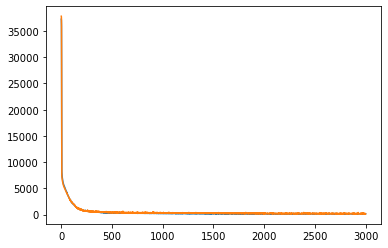

In [21]:
model = Model()
#损失函数
#loss_fn = nn.CrossEntropyLoss()
loss_fn = torch.nn.MSELoss()#损失函数采用常用的均方损失函数

#便于随着训练的进行观察数值的变化
train_loss=[]
test_loss=[]
min_loss=300
max_acc=90

def accury(pred,y):
    return 100-(abs(pred - y)/y*100)

def get_model():
    #获得这个模型
    model = Model()
    #优化函数 优化的是模型所有变量即model.parameters()
    opt = torch.optim.Adam(model.parameters(),lr=0.0005)  #lr=0.001  #选择使用哪种优化器 761个数据集用这个优化器
    #opt = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.3)   # lr=0.01,momentum=0.3
    return model,opt

model,optim = get_model()

for epoch in range(epochs):
    for x,y in train_dl:
        y_pred = model(x)
        #print(y_pred,y)
        loss = loss_fn(y_pred, y)
        # 梯度置为0
        
        optim.zero_grad()
        # 反向传播求解梯度
        loss.backward()
        # 优化
        optim.step()
    # 不需要进行梯度计算
    with torch.no_grad():
        epoch_loss = loss_fn(model(train_x), train_y).data
        epoch_acc = accury(model(train_x), train_y).numpy()
        epoch_test_loss = loss_fn(model(test_x), test_y).data
        epoch_test_acc = accury(model(test_x), test_y).numpy()
        #print(epoch_test_acc,sum(epoch_acc),len(epoch_acc),sum(epoch_acc)/len(epoch_acc))
        print('epoch: ',epoch,'train_loss: ',round(epoch_loss.item(),3),'train_acc: ', round(float(sum(epoch_acc)/len(epoch_acc)),3),
              'test_loss: ',round(epoch_test_loss.item(),3),'test_acc: ',round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3))
        train_loss.append(epoch_loss)
        test_loss.append(epoch_test_loss)
        if epoch_test_loss < min_loss:
            min_loss = epoch_test_loss
            print("min loss:"+str(epoch))
            torch.save(model, 'H:/vamf_model/model_fps4_8.pth')############
            df = pd.DataFrame({'Actual':list(test_y), 'Predicted':list(model(test_x))})  
            print(df)
        if round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3) > max_acc:
            max_acc = round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3)
            print("max acc epoch："+str(epoch)+"        max acc："+str(max_acc))
            
print("End max acc epoch："+str(epoch)+"        max acc："+str(max_acc))         
#print(model(test_x), test_y)
df = pd.DataFrame({'Actual':list(test_y), 'Predicted':list(model(test_x))})  
print(df)
#df = pd.DataFrame({'Actual':list(train_y), 'Predicted':list(model(train_x))})  
#print(df)

plt.plot(range(1,epochs+1),train_loss,label='train_loss')
plt.plot(range(1,epochs+1),test_loss,label='test_loss')
plt.show()
#torch.save(model, 'H:/vamf_model/model_vmaf.pth')

In [18]:
#预测
import time

model = Model()
model=torch.load( 'H:/vamf_model/model_fps4_8.pth')#######3
model.eval()
df = pd.read_excel('E:/研学/实验数据/Jockey.xlsx')
N4 = [4,"first_frame","TI","SI",'keypoint',
       'brightness','edgeLength','Hue1', 'Hue2',
       'Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	'Saturation',
       'Value']

N6 = [6,"first_frame", "TI",'keypoint','brightness','edgeLength',
      'Hue1', 'Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',	 'Saturation','Value']

N8 =  [8,"first_frame","TI","SI",'keypoint',
      'brightness','contrast','edgeLength','Hue1',
      'Hue2','Hue3','Hue4',	'Hue5',	'Hue6',	'Hue7',
      'Saturation']
df = df[N6].values#########
x = torch.from_numpy(df).type(torch.FloatTensor)
t=time.time()
pre = model(x)
t0=time.time()-t
print(t0)
pre

0.0019941329956054688


tensor([[143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],
        [143.8826],


In [13]:
# list转dataframe
df = pd.DataFrame(list(pre.detach().numpy().reshape(-1,90)[0]), columns=['fps'])
# 保存到本地excel
df.to_excel("E:/研学/实验数据/LOL_fps6.xlsx", index=False)

In [1]:
#批量处理FPS预测的特征重要性
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from scipy import stats

#scale放里面误差极大，需对3个x训练不同的模型################
ACC=[]
for i in range(16):
    N=[ "frame_SI","frame_TI",'Value','Saturation','Hue7',
       'Hue6','Hue5','Hue4','Hue3','Hue2','Hue1','edgeLength',
       'contrast','brightness','keypoint',"first_frame"]
    del N[i]
    print(N)
    #读数据集
    data = pd.read_csv("F:/video_cut/Bear_size.csv") 
    X = data[N].values
    Y = data.video8.values.reshape(-1, 1)################
    train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=1)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行
    #print(train_x.size)

    #将数据转换成Tensor LongTensor等价于int64
    train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
    train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
    test_x = torch.from_numpy(test_x).type(torch.FloatTensor)
    test_y = torch.from_numpy(test_y).type(torch.FloatTensor)
    print(test_x.shape)
    points = int(test_x.shape[1])

    #数据只有3805行故batchsize设置8较优

    batch = 8#32 
    no_of_batches = len(data)//batch
    epochs = 3000#3000

    #TensorDataset()可以对tensor进行打包即合并
    train_ds = TensorDataset(train_x,train_y)
    #希望模型不关注训练集数据顺序故用乱序
    train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True)
    test_ds = TensorDataset(test_x,test_y)
    #对测试集不需要用乱序避免工作量增加
    test_dl = DataLoader(test_ds,batch_size=batch)
    #print(test_x,test_y)

    #创建模型
    #继承nn.Module这个类并自定义模型
    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.linear1 = nn.Linear(points,points*2)  # 输入是一个点对（x1，x2）,所以我们输入的神经节点是两个
            self.linear2 = nn.Linear(points*2,points*2, bias=True)
            self.linear3 = nn.Linear(points*2,points*2, bias=True)
            self.linear4 = nn.Linear(points*2,points*2, bias=True)
            self.linear5 = nn.Linear(points*2,points, bias=True)
            self.linear6 = nn.Linear(points,1)  # 输出层由于是二分类，所以输出节点是2
        def forward(self, x):
            x = F.relu(self.linear1(x))
            x = F.relu(self.linear2(x))
            x = F.relu(self.linear3(x))
            x = F.relu(self.linear4(x))
            x = F.relu(self.linear5(x))
            c =self.linear6(x)
            #c = F.softmax(self.linear6(x),dim=1)
            return c
    
    model = Model()
    #损失函数
    #loss_fn = nn.CrossEntropyLoss()
    loss_fn = torch.nn.MSELoss()#损失函数采用常用的均方损失函数

    #便于随着训练的进行观察数值的变化
    train_loss=[]
    test_loss=[]
    min_loss=1
    max_acc=1

    def accury(pred,y):
        return 100-(abs(pred - y)/y*100)

    def get_model():
        #获得这个模型
        model = Model()
        #优化函数 优化的是模型所有变量即model.parameters()
        opt = torch.optim.Adam(model.parameters(),lr=0.0005)  #lr=0.001  #选择使用哪种优化器 761个数据集用这个优化器
        #opt = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.3)   # lr=0.01,momentum=0.3
        return model,opt

    model,optim = get_model()

    for epoch in range(epochs):
        for x,y in train_dl:
            y_pred = model(x)
            #print(y_pred,y)
            loss = loss_fn(y_pred, y)
            # 梯度置为0
        
            optim.zero_grad()
            # 反向传播求解梯度
            loss.backward()
            # 优化
            optim.step()
        # 不需要进行梯度计算
        with torch.no_grad():
            epoch_loss = loss_fn(model(train_x), train_y).data
            epoch_acc = accury(model(train_x), train_y).numpy()
            epoch_test_loss = loss_fn(model(test_x), test_y).data
            epoch_test_acc = accury(model(test_x), test_y).numpy()
            #print(epoch_test_acc,sum(epoch_acc),len(epoch_acc),sum(epoch_acc)/len(epoch_acc))
            print('epoch: ',epoch,'train_loss: ',round(epoch_loss.item(),3),'train_acc: ', round(float(sum(epoch_acc)/len(epoch_acc)),3),
                  'test_loss: ',round(epoch_test_loss.item(),3),'test_acc: ',round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3))
            train_loss.append(epoch_loss)
            test_loss.append(epoch_test_loss)
            if epoch_test_loss < min_loss:
                min_loss = epoch_test_loss
                print("min loss:"+str(epoch))
                df = pd.DataFrame({'Actual':list(test_y), 'Predicted':list(model(test_x))})  
            if round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3) > max_acc:
                max_acc = round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3)         
    print("End max acc epoch："+str(epoch)+"        max acc："+str(max_acc)) 
    ACC.append(max_acc)
print(ACC)
# list转dataframe
df = pd.DataFrame(ACC, columns=['acc'])
# 保存到本地excel
df.to_excel("F:/video_cut/psnr_acc.xlsx", index=False)


IndentationError: unexpected indent (<ipython-input-1-1b8b3ab6d2e6>, line 16)